In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model='LSTM' #RF XGB
fdata='artdata_1000.csv'
fname='art1000_'+model+'_acc_time.csv'#'art1000_RF_acc_time.csv'#'art1000_XGB_acc_time.csv'
df=pd.read_csv(fdata)
df.columns

Index(['t', '000', '001', '002', '003', '004', '005', '006', '007', '008',
       ...
       '990', '991', '992', '993', '994', '995', '996', '997', '998', '999'],
      dtype='object', length=1001)

In [3]:
scores=pd.read_csv(fname)[:5] #5 levels of complexity
scores

,level,time,000,001,002,003,004,005,006,007,...,990,991,992,993,994,995,996,997,998,999
0,0,7811.454789,0.920467,0.947217,1.042106,1.448483,0.910320,1.127565,0.898132,1.379154,...,10.942434,23.509465,6.755895,8.432639,9.509990,2.106125,15.833097,10.237217,23.080778,6.540122
1,1,7608.982551,0.474167,0.508843,0.743566,0.596222,1.238942,2.169516,0.639134,2.407580,...,10.517475,22.472203,7.713435,8.954473,9.040197,2.253868,13.165007,12.107271,24.179171,5.128373
2,2,7904.843854,0.992377,0.538004,2.327874,3.223064,0.652893,1.458607,1.224507,0.930547,...,9.633485,28.236085,7.128702,8.882158,11.386283,2.623377,15.314550,10.772417,22.410517,3.988277
3,3,8105.009564,2.884480,2.480241,0.564425,0.325066,3.937556,1.817790,0.746813,0.942862,...,9.483674,26.500329,9.499603,7.997117,8.278523,2.198934,13.515670,9.915788,22.990962,11.396834
4,4,8443.904852,1.825809,0.240279,0.286317,0.336762,0.403236,0.873413,1.072736,0.945329,...,9.186414,30.235363,8.350286,7.608048,9.186995,2.582528,13.452650,9.682066,20.664735,5.036209


In [4]:
nlevel=5
'''Quantity strategy with equal classes'''
labels=pd.DataFrame(columns=['series', 'level'])
allser=scores.columns[2:]
labels.series=allser
a={}
for i in range(nlevel):
    labels['score%i'%i]=scores.loc[i, allser].values
for i in range(nlevel):
    a[i]=labels[labels['score%i'%i].rank(method='dense') <= len(allser)//nlevel].series.values
    labels=labels.drop(labels[labels['score%i'%i].rank(method='dense') <= len(allser)//nlevel].index)

labels=pd.DataFrame(columns=['series', 'level'])
allser=scores.columns[2:]#.tolist()
labels.series=allser
for i in a.keys():
    labels.loc[labels.series.isin(a[i]), 'level']=i
for i in range(nlevel):
    labels['score%i'%i]=scores.loc[i, allser].values
for i in range(nlevel):
    minimals=labels.iloc[:,2:i+3].min(axis=1).copy()
    labels['min%i'%i]=minimals
labels

,series,level,score0,score1,score2,score3,score4,min0,min1,min2,min3,min4
0,000,0,0.920467,0.474167,0.992377,2.884480,1.825809,0.920467,0.474167,0.474167,0.474167,0.474167
1,001,0,0.947217,0.508843,0.538004,2.480241,0.240279,0.947217,0.508843,0.508843,0.508843,0.240279
2,002,0,1.042106,0.743566,2.327874,0.564425,0.286317,1.042106,0.743566,0.743566,0.564425,0.286317
3,003,0,1.448483,0.596222,3.223064,0.325066,0.336762,1.448483,0.596222,0.596222,0.325066,0.325066
4,004,0,0.910320,1.238942,0.652893,3.937556,0.403236,0.910320,0.910320,0.652893,0.652893,0.403236
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0,2.106125,2.253868,2.623377,2.198934,2.582528,2.106125,2.106125,2.106125,2.106125,2.106125
996,996,4,15.833097,13.165007,15.314550,13.515670,13.452650,15.833097,13.165007,13.165007,13.165007,13.165007
997,997,3,10.237217,12.107271,10.772417,9.915788,9.682066,10.237217,10.237217,10.237217,9.915788,9.682066
998,998,4,23.080778,24.179171,22.410517,22.990962,20.664735,23.080778,23.080778,22.410517,22.410517,20.664735


In [1]:
'''Can be used to get rid from outliers'''
# l=2
# n=scores.iloc[l,2:].argmax(0)
# scores.iloc[l,2+n]=np.mean([scores.iloc[2,1+n], scores.iloc[2,3+n]])
# scores.iloc[l,2:].max(), n

'Can be used to get rid from outliers'

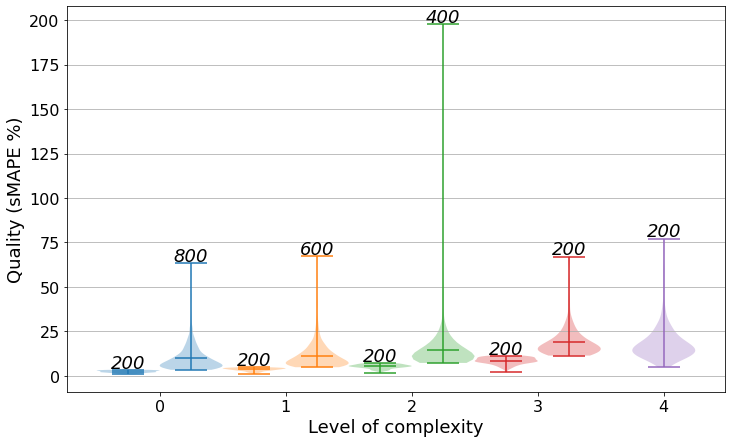

In [6]:
plt.figure(figsize=(10,6))
for i in range(nlevel-1):
    col='score%i'%i
    l1=labels[labels.level==i][col].values
    l2=labels[labels.level>i][col].values
    plt.violinplot((l1,l2), positions=[i-.25, i+.25], showmeans=True)
    plt.text(i-.25, max(l1)+1, str(len(l1)), horizontalalignment='center', style='italic', size=18)
    plt.text(i+.25, max(l2)+1, str(len(l2)), horizontalalignment='center', style='italic', size=18)
plt.xticks(np.arange(nlevel), np.arange(nlevel), size=16)
plt.yticks(size=16)
plt.xlabel('Level of complexity', size=18)
plt.ylabel('Quality (sMAPE %)', size=18)
l2=labels[labels.level==nlevel-1].score4
plt.violinplot(labels[labels.level==nlevel-1].score4, positions=[4])
plt.text(nlevel-1, max(l2)+1, str(len(l2)), horizontalalignment='center', style='italic', size=18)
plt.grid(axis='y')
plt.tight_layout(pad=0.1)
#plt.savefig('f'+model+'_amount.png', dpi=300, format='png' )
plt.show()

In [7]:
''' Sieve performance'''
strategy='level' #'quantile'
q=10. # уровень в % или квантили 0..1
labels=pd.DataFrame(columns=['series', 'level'])
allser=scores.columns[2:]
labels.series=allser
quality=[q]*nlevel # это для level strategy
for i in range(nlevel):
    s=scores.loc[i, allser].values
    if strategy=='level': 
        b=quality[i] # levels
    else:
        b=np.quantile(s, .25) #это для quantile strategy
    j=np.where(s<=b)[0]
    print('level %i - %s %.3f: %i items'%(i,strategy, b, len(j)))
    labels.iloc[labels.index[labels.series.isin(allser[j]).tolist()], 1]=i
    allser=np.delete(allser,j)
labels=labels.fillna(value=4)
allser=scores.columns[2:]
for i in range(nlevel):
    labels['score%i'%i]=scores.loc[i, allser].values
minimals=labels.iloc[:,2:7].min(axis=1).copy()
labels

level 0 - level 10.000: 718 items
level 1 - level 10.000: 47 items
level 2 - level 10.000: 20 items
level 3 - level 10.000: 12 items
level 4 - level 10.000: 8 items


,series,level,score0,score1,score2,score3,score4
0,000,0,0.920467,0.474167,0.992377,2.884480,1.825809
1,001,0,0.947217,0.508843,0.538004,2.480241,0.240279
2,002,0,1.042106,0.743566,2.327874,0.564425,0.286317
3,003,0,1.448483,0.596222,3.223064,0.325066,0.336762
4,004,0,0.910320,1.238942,0.652893,3.937556,0.403236
...,...,...,...,...,...,...,...
995,995,0,2.106125,2.253868,2.623377,2.198934,2.582528
996,996,4,15.833097,13.165007,15.314550,13.515670,13.452650
997,997,3,10.237217,12.107271,10.772417,9.915788,9.682066
998,998,4,23.080778,24.179171,22.410517,22.990962,20.664735


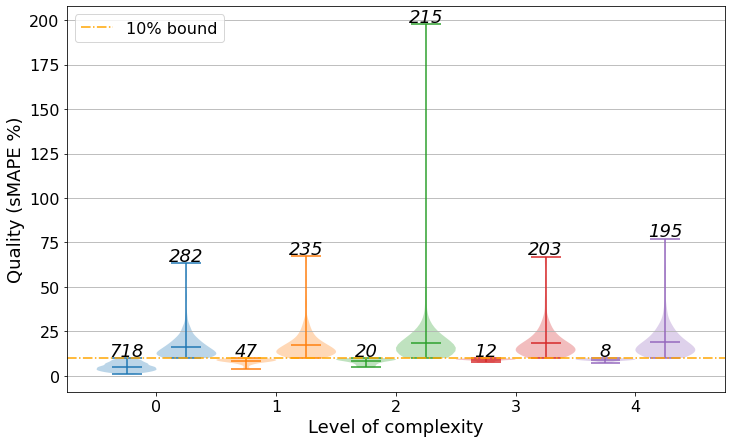

0

In [8]:
plt.figure(figsize=(10,6))
lab=labels.copy()
for i in range(nlevel):
    col='score%i'%i
    if strategy=='level': 
        b=quality[i] # levels
    else:
        b=np.quantile(s, .25) #quantile strategy
    l1=lab[lab[col]<=b][col]  
    l2=lab[lab[col]>b][col]
    if len(l1)==0:
        l1=[10]
    else: lab=lab.drop(l1.index)
    if len(l2)==0:
        l2=[0]
    
    plt.violinplot((l1, l2), positions=[i-.25, i+.25], showmeans=True)
    plt.text(i-.25, max(l1)+1, str(len(l1)), horizontalalignment='center', style='italic', size=18)
    plt.text(i+.25, max(l2)+1, str(len(l2)), horizontalalignment='center', style='italic', size=18)
if strategy=='level':
    plt.axhline(q, ls='-.', c='orange', label='%.0f%% bound'%q)
    plt.legend(fontsize=16, loc=2)
plt.xticks(np.arange(nlevel), np.arange(nlevel), size=16)
plt.yticks(size=16)
plt.xlabel('Level of complexity', size=18)
plt.ylabel('Quality (sMAPE %)', size=18)
#plt.violinplot(labels[labels.level==5].score4, positions=[5])
plt.grid(axis='y')
plt.tight_layout(pad=0.1)
#plt.savefig('f'+model+'_%s%.0f_real.png'%(strategy, q), dpi=300, format='png' )
plt.show()
len(labels[labels.level==5])